# Dimensionality Reduction

## 1. Introduction to Dimensionality Reduction

### What is Dimensionality Reduction?

In the realm of machine learning and data analysis, we frequently work with datasets that have a high number of features (dimensions). While more features can potentially provide more information, high-dimensional data often presents several challenges:

- **Curse of Dimensionality**: As the number of dimensions increases, the volume of the feature space grows exponentially, making the data sparse. This sparsity can degrade the performance of machine learning algorithms, as they struggle to find patterns in the data.
- **Computational Complexity**: High-dimensional data increases the computational cost and time for processing and modeling.
- **Overfitting**: Models trained on high-dimensional data can overfit, capturing noise instead of the underlying patterns.
- **Difficulty in Visualization**: Visualizing data beyond three dimensions is non-trivial, limiting our ability to intuitively understand and explore the data.

**Dimensionality Reduction** refers to the process of reducing the number of input variables in a dataset while preserving as much information as possible. This simplification helps in making the data more manageable and can improve the performance of machine learning models.

Dimensionality reduction techniques are broadly categorized into:

- **Feature Selection**: Selecting a subset of the most significant features.
- **Feature Extraction**: Transforming the data into a lower-dimensional space (e.g., using PCA) by creating new features that are combinations of the original features.

## 2. Applications of Dimensionality Reduction

Dimensionality reduction has several crucial applications and we will explore the following applications:

- **Data Visualization**: By reducing data to two or three dimensions, we can create visual representations that help in identifying patterns, clusters, and outliers.
- **Noise Reduction**: Eliminating less important features can reduce noise, leading to cleaner data and better model performance.
- **Feature Extraction**: Helps in identifying and combining features that capture the most variance in the data.
- **Speeding Up Algorithms**: Simplifying data reduces computational requirements, leading to faster training and prediction times.
- **Preventing Overfitting**: Reducing the number of features decreases model complexity, which can prevent overfitting and improve generalization to new data.

### 2.1 Data Visualization

**Dataset**: MNIST Handwritten Digits Dataset

**Description**:

The MNIST dataset consists of 70,000 images of handwritten digits (0-9), each of size 28x28 pixels, resulting in a 784-dimensional feature space. Visualizing this high-dimensional data is challenging.

**Objective**:

- Use PCA to reduce the dimensionality of the MNIST dataset from 784 to 2 dimensions.
- Visualize the data in 2D to observe patterns and clusters.

**Visualization**:

![MNIST PCA Visualization](pics/mnist_pca_visualizations.png)

### 2.2 Noise Reduction

**Dataset**: Fashion MNIST Dataset with Added Noise

**Description**:

The Fashion MNIST dataset is similar to MNIST but contains images of clothing items. We'll add noise to the images and use PCA to reconstruct them, effectively reducing noise.

**Objective**:

- Add Gaussian noise to the images.
- Use PCA to reconstruct the images from a reduced number of components.
- Compare original, noisy, and reconstructed images to observe noise reduction.

**Visualization**:

![Fashion MNIST Noise Reduction](pics/fashion_mnist_noise_reduction.png)

### 2.3 Feature Extraction

**Dataset**: Labeled Faces in the Wild (LFW)

**Description**:

The LFW dataset consists of images of faces collected from the web. Each face is represented by high-dimensional pixel data.

**Objective**:

- Use PCA to extract principal components known as "eigenfaces".
- Visualize the eigenfaces to understand the most significant features in the dataset.

**Visualization**:

![LFW Eigenfaces](pics/lfw_eigenfaces.png)

## 3. PCA: Principal Component Analysis

### Understanding PCA

Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction while preserving as much variability (information) as possible. It transforms the original data into a new coordinate system where the greatest variances lie on the first coordinates (principal components), the second greatest variances on the second coordinates, and so on.

### **Goal**

Find the directions (principal components) that maximize the variance in the data.

### **Process Overview**

1. **Standardize the Data**: Center and scale the data.
2. **Compute the Covariance Matrix**.
3. **Calculate Eigenvalues and Eigenvectors**.
4. **Sort Eigenvectors**: Based on eigenvalues in descending order.
5. **Project Data**: Onto the selected principal components.

### Dataset Description: Fashion MNIST

The **Fashion MNIST** dataset is a popular alternative to the original MNIST dataset of handwritten digits. It contains 70,000 grayscale images of fashion items, each of size 28x28 pixels. There are 10 categories/classes:

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

Each image is represented as a 784-dimensional vector (since 28x28 = 784), making it suitable for demonstrating PCA on high-dimensional data.

In [16]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os

In [2]:
# Define paths to your CSV files
base_path = "~/Documents/STUDY/AI/Codes/Unsupervised_learning/Dimensionality_Reduction"  # Note: Space in path might cause issues
train_file = os.path.join(base_path, "fashion-mnist_train.csv")
test_file = os.path.join(base_path, "fashion-mnist_test.csv")

# Load the CSV files into pandas DataFrames
train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

# Extract labels (y_train, y_test)
y_train = train_df['label'].values  # Assuming 'label' is the column name
y_test = test_df['label'].values

# Extract pixel data (X_train, X_test)
X_train = train_df.drop('label', axis=1).values  # Drop the label column
X_test = test_df.drop('label', axis=1).values

# Reshape the data into 28x28 images (if not already done in CSV)
X_train = X_train.reshape(-1, 28, 28)
X_test = X_test.reshape(-1, 28, 28)

# Combine train and test data for PCA
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

# Flatten images to create feature vectors for PCA
X_flattened = X.reshape(X.shape[0], -1)

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_flattened = scaler.fit_transform(X_flattened)

# Display the shape of the data
print(f"Data shape: {X_flattened.shape}")  # Should be (70000, 784)
print(f"Labels shape: {y.shape}")          # Should be (70000,)

Data shape: (70000, 784)
Labels shape: (70000,)


#### Visualize a Sample Image

Let's visualize a sample image from the dataset to understand what the data represents.

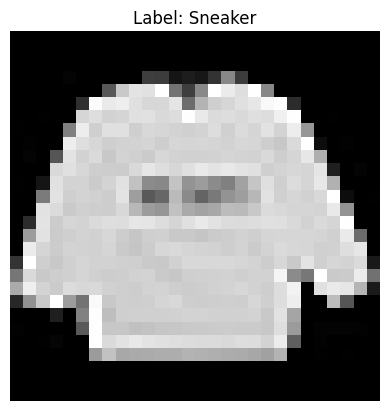

In [10]:
# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualize a sample image
plt.imshow(X[0], cmap='gray')
plt.title(f"Label: {class_names[y[21]]}")
plt.axis('off')
plt.show()

### From Scratch Implementation

#### Step 1: Standardize the Data

Before performing PCA, it's important to standardize the data because PCA is sensitive to the variances of the original variables. Variables with larger scales can dominate the principal components if data is not standardized.

##### **Mathematical Expression**

Given a dataset $X$ with $n$ samples and $p$ features, the standardized data $Z$ is computed as:

$$
Z_{ij} = \frac{X_{ij} - \mu_j}{\sigma_j}
$$

Where:
- $X_{ij}$ is the value of the $j^{th}$ feature for the $i^{th}$ sample.
- $\mu_j$ is the mean of the $j^{th}$ feature.
- $\sigma_j$ is the standard deviation of the $j^{th}$ feature.

In [11]:
# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_flattened)

# Display the shape of the standardized data
print(f"Standardized Data Shape: {X_standardized.shape}")

Standardized Data Shape: (70000, 784)


#### Step 2: Compute the Covariance Matrix

The covariance matrix expresses the correlation between different features in the data. It is a square matrix that provides the covariance between each pair of features.

##### **Mathematical Expression**

For standardized data $Z$, the covariance matrix $C$ is computed as:

$$
C = \frac{1}{n - 1} Z^T Z
$$

Where:
- $Z^T$ is the transpose of the standardized data matrix $Z$.
- $n$ is the number of samples.

**Note**: Since the number of features (784) is large, computing the full covariance matrix can be computationally intensive. Therefore, we may use techniques like Singular Value Decomposition (SVD) or truncated computations to handle large datasets.

In [12]:
# Compute the covariance matrix
# For large datasets, it's more efficient to compute the covariance matrix using numpy's dot product
n_samples = X_standardized.shape[0]
cov_matrix = np.dot(X_standardized.T, X_standardized) / (n_samples - 1)

# Display the shape of the covariance matrix
print(f"Covariance Matrix Shape: {cov_matrix.shape}")

# Display the covariance matrix
print(f"Covariance Matrix: \n{cov_matrix}")

Covariance Matrix Shape: (784, 784)
Covariance Matrix: 
[[1.00001429 0.23534822 0.05202345 ... 0.00905144 0.02526332 0.03874641]
 [0.23534822 1.00001429 0.73519706 ... 0.03254326 0.02373375 0.01614609]
 [0.05202345 0.73519706 1.00001429 ... 0.03353754 0.01539834 0.01133805]
 ...
 [0.00905144 0.03254326 0.03353754 ... 1.00001429 0.65044071 0.22973351]
 [0.02526332 0.02373375 0.01539834 ... 0.65044071 1.00001429 0.47054369]
 [0.03874641 0.01614609 0.01133805 ... 0.22973351 0.47054369 1.00001429]]


#### Step 3: Calculate Eigenvalues and Eigenvectors

Eigenvalues and eigenvectors are computed from the covariance matrix to identify the principal components. The eigenvectors represent the directions of maximum variance (principal components), and the eigenvalues indicate the magnitude of variance in those directions.

##### **Mathematical Expression**

We solve the equation:

$$
C \mathbf{v} = \lambda \mathbf{v}
$$

Where:
- $C$ is the covariance matrix.
- $\mathbf{v}$ is the eigenvector.
- $\lambda$ is the eigenvalue corresponding to $\mathbf{v}$.

**Note**: Computing eigenvalues and eigenvectors for large covariance matrices can be computationally intensive. We can use SVD to compute the principal components directly without computing the covariance matrix.

In [13]:
# Compute eigenvalues and eigenvectors using Singular Value Decomposition (SVD)
U, S, VT = np.linalg.svd(X_standardized, full_matrices=False)

# Eigenvalues are the square of singular values divided by (n_samples - 1)
eig_values = (S ** 2) / (n_samples - 1)

# Eigenvectors are the transpose of V from SVD
eig_vectors = VT.T

# Display the shape of eigenvalues and eigenvectors
print(f"Eigenvalues Shape: {eig_values.shape}")
print(f"Eigenvectors Shape: {eig_vectors.shape}")

Eigenvalues Shape: (784,)
Eigenvectors Shape: (784, 784)


#### Step 4: Sort Eigenvectors by Eigenvalues in Descending Order

We sort the eigenvectors so that the principal components are ordered according to the amount of variance they explain.

##### **Process**

- Pair each eigenvalue with its corresponding eigenvector.
- Sort the pairs in descending order based on the eigenvalues.

In [14]:
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(eig_values[i], eig_vectors[:, i]) for i in range(len(eig_values))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Extract the sorted eigenvalues and eigenvectors
sorted_eig_values = np.array([eig_pair[0] for eig_pair in eig_pairs])
sorted_eig_vectors = np.array([eig_pair[1] for eig_pair in eig_pairs]).T

# Display the top 10 eigenvalues
print("Top 10 Eigenvalues:")
for i in range(10):
    print(f"Eigenvalue {i+1}: {sorted_eig_values[i]}")

Top 10 Eigenvalues:
Eigenvalue 1: 172.90222098133057
Eigenvalue 2: 112.90770786878538
Eigenvalue 3: 42.811373489069254
Eigenvalue 4: 40.04063407296318
Eigenvalue 5: 31.80842532344856
Eigenvalue 6: 23.60712845676129
Eigenvalue 7: 21.604737995824827
Eigenvalue 8: 18.166357493619365
Eigenvalue 9: 13.31212266572533
Eigenvalue 10: 10.34102087423818


#### Step 5: Project Data onto the Selected Principal Components

We construct a projection matrix using the top $k$ eigenvectors to transform the data into the new feature space (principal components).

##### **Mathematical Expression**

The projection matrix $W$ is formed by stacking the top $k$ eigenvectors:

$$
W = [\mathbf{v}_1, \mathbf{v}_2, \dots, \mathbf{v}_k]
$$

The projected data $Z$ is obtained by:

$$
Z = X_{\text{standardized}} \cdot W
$$

Where:
- $X_{\text{standardized}}$ is the standardized data matrix.
- $W$ is the projection matrix containing the top $k$ eigenvectors.

In [15]:
# Select the top k eigenvectors (here we choose k=2 for visualization)
k = 2
matrix_w = sorted_eig_vectors[:, :k]

# Project the standardized data onto the new feature space
X_pca = X_standardized.dot(matrix_w)

# Create a DataFrame with the projected data
principal_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(k)])
principal_df['label'] = y

# Display the first 5 rows of the projected data
print("Projected Data (first 5 samples):")
print(principal_df.head())

Projected Data (first 5 samples):
         PC1        PC2  label
0  10.617836  15.008835      2
1 -12.030261  11.767520      9
2  20.489582   1.664002      6
3   9.629354  -6.753084      0
4  11.507041 -11.648655      3


#### Explained Variance Ratio

The explained variance ratio indicates how much variance is explained by each of the selected principal components.

Explained Variance Ratio for Top 10 Components:
PC1: 0.2205
PC2: 0.1440
PC3: 0.0546
PC4: 0.0511
PC5: 0.0406
PC6: 0.0301
PC7: 0.0276
PC8: 0.0232
PC9: 0.0170
PC10: 0.0132


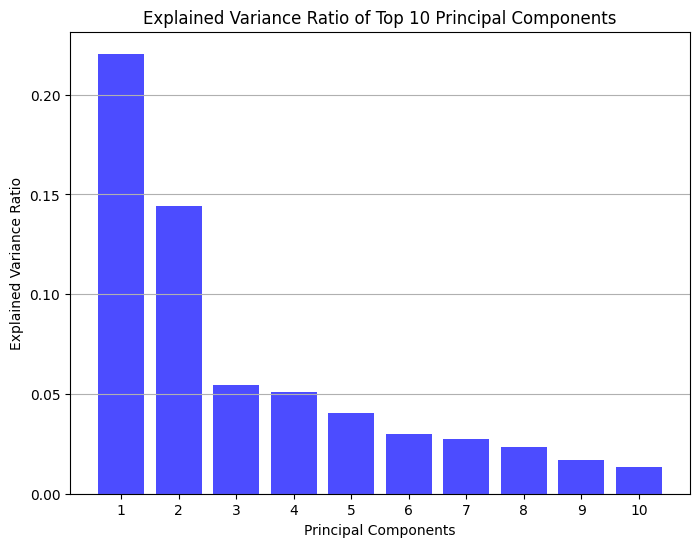

In [17]:
# Compute the explained variance ratio
explained_variance_ratio = sorted_eig_values / np.sum(sorted_eig_values)

# Display the explained variance ratio for the top 10 components
print("Explained Variance Ratio for Top 10 Components:")
for i in range(10):
    print(f"PC{i+1}: {explained_variance_ratio[i]:.4f}")


plt.figure(figsize=(8, 6))
components = np.arange(1, 11)
plt.bar(components, explained_variance_ratio[:10], alpha=0.7, color='blue')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Top 10 Principal Components')
plt.xticks(components)
plt.grid(axis='y')
plt.show()

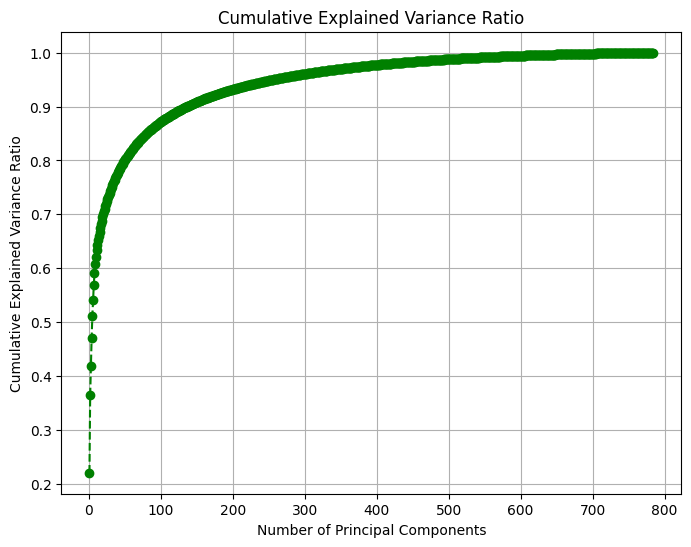

In [18]:
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--', color='green')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()


#### Visualization of the Projected Data

Now, we can visualize the data in the new feature space defined by the first two principal components.

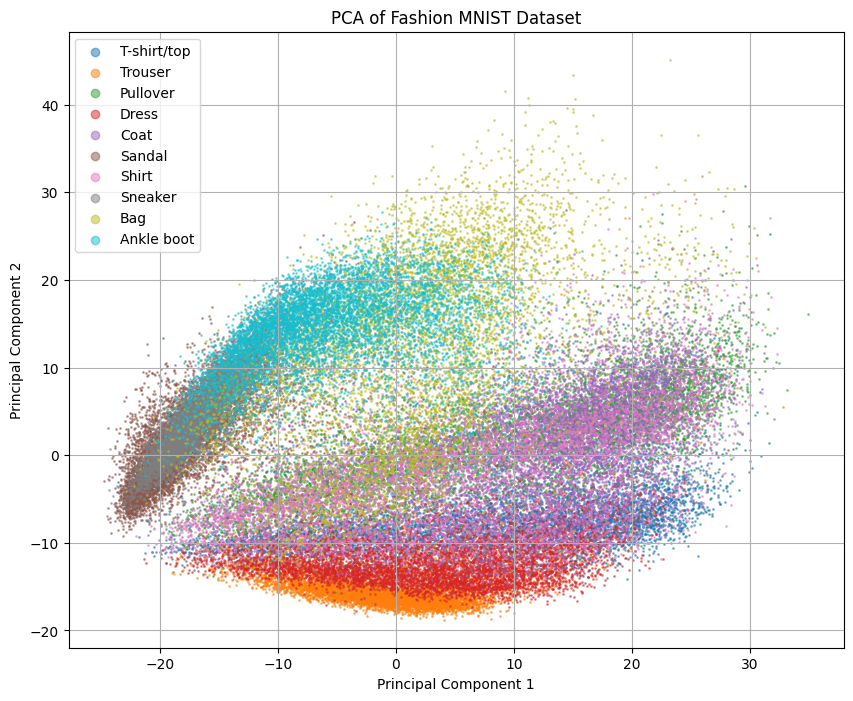

In [19]:
# Plot the projected data
plt.figure(figsize=(10,8))

for label in np.unique(y):
    indices = principal_df['label'] == label
    plt.scatter(principal_df.loc[indices, 'PC1'],
                principal_df.loc[indices, 'PC2'],
                s=1, alpha=0.5, label=class_names[label])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Fashion MNIST Dataset')
plt.legend(markerscale=6)
plt.grid()
plt.show()